In [1]:
import pandas as pd

# Path to the newly uploaded CSV file
csv_file_path = '../data/salesforce_data.csv'

# Load the CSV into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1515369600,2018-01-08 00:00:00 +0000 UTC,-28800,Salesforce Tower,37.789744,-122.397234,284.66,NaN,282.23,284.09,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
1,1515373200,2018-01-08 01:00:00 +0000 UTC,-28800,Salesforce Tower,37.789744,-122.397234,284.51,NaN,282.43,283.97,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
2,1515376800,2018-01-08 02:00:00 +0000 UTC,-28800,Salesforce Tower,37.789744,-122.397234,284.19,NaN,282.28,283.65,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
3,1515380400,2018-01-08 03:00:00 +0000 UTC,-28800,Salesforce Tower,37.789744,-122.397234,283.76,NaN,282.52,283.28,...,NaN,NaN,NaN,NaN,NaN,99,804,Clouds,overcast clouds,04n
4,1515384000,2018-01-08 04:00:00 +0000 UTC,-28800,Salesforce Tower,37.789744,-122.397234,283.46,NaN,282.22,282.95,...,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n


In [18]:
# Select only the columns we are interested in
df_filtered = df[['temp', 'rain_1h', 'clouds_all', 'dt']]

# Convert 'dt' (Unix time) column to a timestamp
df_filtered['dt'] = pd.to_datetime(df_filtered['dt'], unit='s')

df_filtered.fillna(0, inplace=True)

# Display the first few rows of the filtered DataFrame
df_filtered.head()

/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_23714/3041197947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['dt'] = pd.to_datetime(df_filtered['dt'], unit='s')
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_23714/3041197947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)


,temp,rain_1h,clouds_all,dt
0,284.66,0.0,100,2018-01-08 00:00:00
1,284.51,0.0,100,2018-01-08 01:00:00
2,284.19,0.0,100,2018-01-08 02:00:00
3,283.76,0.0,99,2018-01-08 03:00:00
4,283.46,0.0,98,2018-01-08 04:00:00


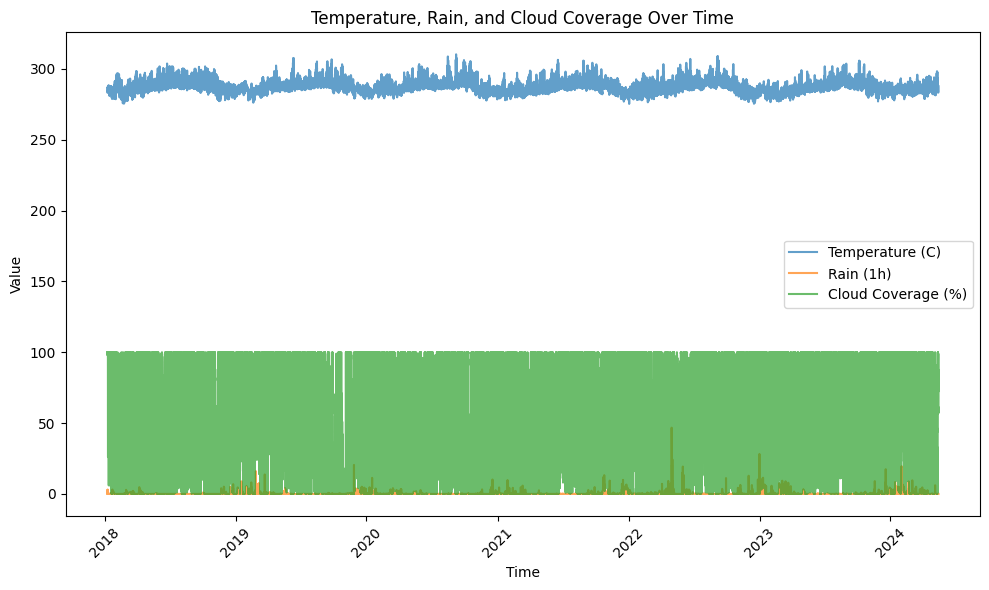

In [19]:
import matplotlib.pyplot as plt

# Assuming df_filtered is already prepared and NaN values are replaced with 0
# Let's plot the 'rain_1h', 'temp', and 'clouds_all' on the same chart

plt.figure(figsize=(10, 6))

# Plot each column
plt.plot(df_filtered['dt'], df_filtered['temp'], label='Temperature (C)', alpha=0.7)
plt.plot(df_filtered['dt'], df_filtered['rain_1h'], label='Rain (1h)', alpha=0.7)
plt.plot(df_filtered['dt'], df_filtered['clouds_all'], label='Cloud Coverage (%)', alpha=0.7)

# Add title and labels
plt.title('Temperature, Rain, and Cloud Coverage Over Time')
plt.xlabel('Time')
plt.ylabel('Value')

# Show legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_23714/646486500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['dt'] = df_filtered['dt'].dt.tz_localize('America/Los_Angeles', ambiguous='NaT', nonexistent='NaT')
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_23714/646486500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['temp'] = (df_trimmed['temp'] - df_trimmed['temp'].min()) / (df_trimmed['temp'].max() - df_trimmed['temp'].min())
/var/folders/ww/rg8z

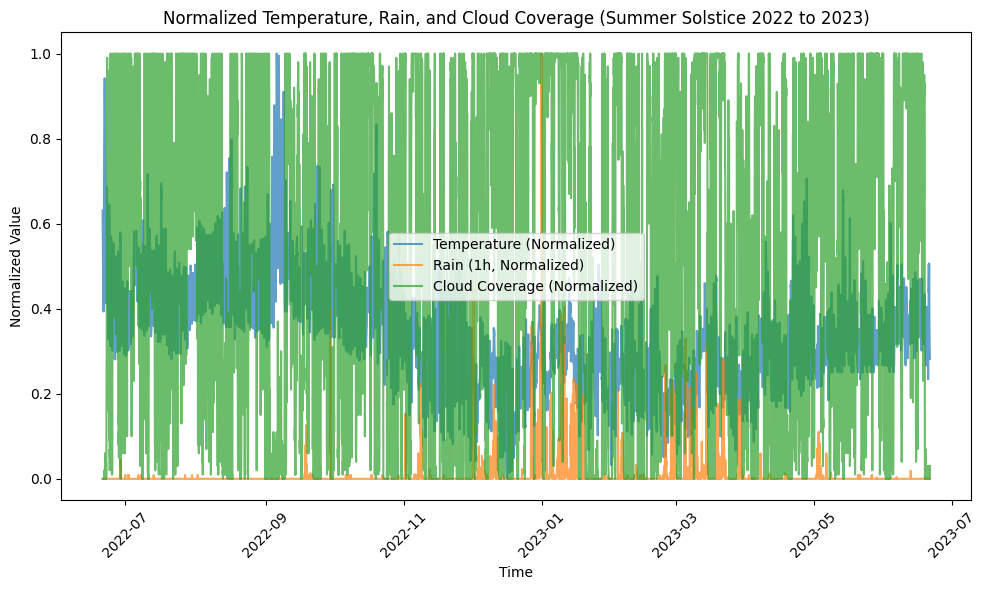

In [20]:

# Define the start and end times for the summer solstice in San Francisco
start_time = pd.Timestamp('2022-06-21 02:00:00', tz='America/Los_Angeles')
end_time = pd.Timestamp('2023-06-21 08:00:00', tz='America/Los_Angeles')

# Ensure 'dt' column is timezone-aware to match start_time and end_time
df_filtered['dt'] = df_filtered['dt'].dt.tz_localize('America/Los_Angeles', ambiguous='NaT', nonexistent='NaT')

# Filter the DataFrame to include only data between the summer solstice 2022 and 2023
df_trimmed = df_filtered[(df_filtered['dt'] >= start_time) & (df_filtered['dt'] <= end_time)]

# Normalize each of the data columns ('temp', 'rain_1h', 'clouds_all') independently to the range 0-1
df_trimmed['temp'] = (df_trimmed['temp'] - df_trimmed['temp'].min()) / (df_trimmed['temp'].max() - df_trimmed['temp'].min())
df_trimmed['rain_1h'] = (df_trimmed['rain_1h'] - df_trimmed['rain_1h'].min()) / (df_trimmed['rain_1h'].max() - df_trimmed['rain_1h'].min())
df_trimmed['clouds_all'] = (df_trimmed['clouds_all'] - df_trimmed['clouds_all'].min()) / (df_trimmed['clouds_all'].max() - df_trimmed['clouds_all'].min())

# Plotting the normalized data
plt.figure(figsize=(10, 6))

# Plot each normalized column
plt.plot(df_trimmed['dt'], df_trimmed['temp'], label='Temperature (Normalized)', alpha=0.7)
plt.plot(df_trimmed['dt'], df_trimmed['rain_1h'], label='Rain (1h, Normalized)', alpha=0.7)
plt.plot(df_trimmed['dt'], df_trimmed['clouds_all'], label='Cloud Coverage (Normalized)', alpha=0.7)

# Add title and labels
plt.title('Normalized Temperature, Rain, and Cloud Coverage (Summer Solstice 2022 to 2023)')
plt.xlabel('Time')
plt.ylabel('Normalized Value')

# Show legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [23]:
df_trimmed.to_csv('../data/salesforce_2022_2023.csv')
df_trimmed.head()

,temp,rain_1h,clouds_all,dt
39002,0.631140,0.0,0.0,2022-06-21 02:00:00-07:00
39003,0.587079,0.0,0.0,2022-06-21 03:00:00-07:00
39004,0.574576,0.0,0.0,2022-06-21 04:00:00-07:00
39005,0.532599,0.0,0.0,2022-06-21 05:00:00-07:00
39006,0.479309,0.0,0.0,2022-06-21 06:00:00-07:00


In [32]:
import numpy as np
from scipy.interpolate import interp1d
csv_file_path = ('../data/salesforce_2022_2023.csv')

df = pd.read_csv(csv_file_path)

# Select only the columns we are interested in
df_filtered = df[['temp', 'rain_1h', 'clouds_all']]

# Replace NaN values with 0
df_filtered.fillna(0, inplace=True)

# Reset the index to ensure it's sequential and clean
df_filtered.reset_index(drop=True, inplace=True)

# Define the target length for interpolation
target_length = 131129

# Generate a normalized index array (0 to 1) for original and target lengths
x_original = np.linspace(0, 1, len(df_filtered))
x_target = np.linspace(0, 1, target_length)

# Sigmoid function for smooth interpolation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply sigmoid to the original index data to create a smooth transition curve
x_original_sigmoid = sigmoid((x_original - 0.5) * 10)
x_target_sigmoid = sigmoid((x_target - 0.5) * 10)

# Interpolate each data column ('temp', 'rain_1h', 'clouds_all') using the sigmoid curve
interpolated_temp = interp1d(x_original_sigmoid, df_filtered['temp'], kind='cubic')(x_target_sigmoid)
interpolated_rain = interp1d(x_original_sigmoid, df_filtered['rain_1h'], kind='cubic')(x_target_sigmoid)
interpolated_clouds = interp1d(x_original_sigmoid, df_filtered['clouds_all'], kind='cubic')(x_target_sigmoid)

# Create a new DataFrame with the interpolated data
df_interpolated = pd.DataFrame({
    'temp': interpolated_temp,
    'rain_1h': interpolated_rain,
    'clouds_all': interpolated_clouds
})

# Save or display the interpolated DataFrame
df_interpolated.to_csv('../data/interpolated_salesforce_data.csv', index=False)


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_23714/1145778241.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)


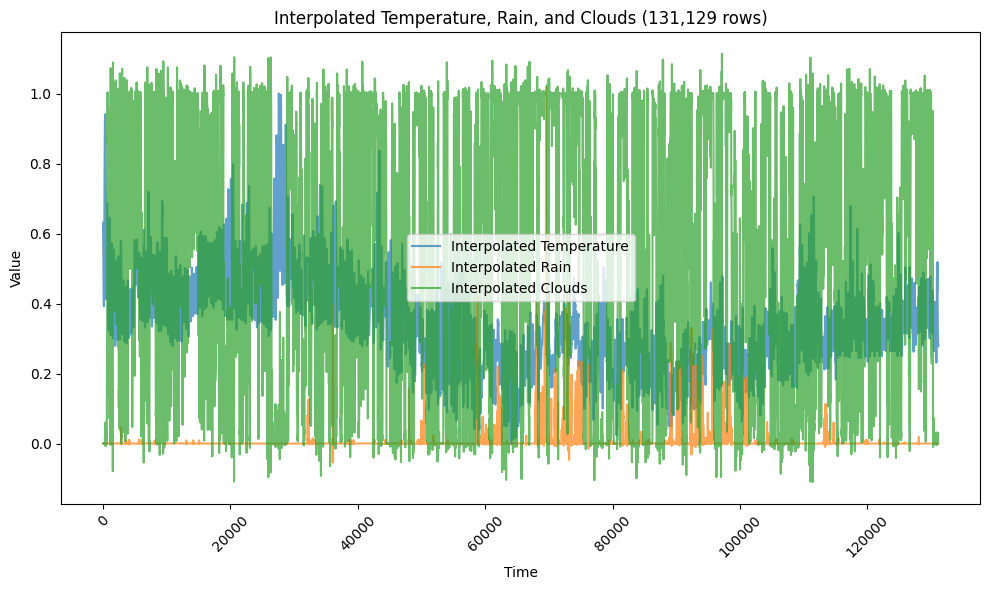

In [33]:
# Optionally, plot the interpolated data
plt.figure(figsize=(10, 6))
plt.plot(df_interpolated.index, df_interpolated['temp'], label='Interpolated Temperature', alpha=0.7)
plt.plot(df_interpolated.index, df_interpolated['rain_1h'], label='Interpolated Rain', alpha=0.7)
plt.plot(df_interpolated.index, df_interpolated['clouds_all'], label='Interpolated Clouds', alpha=0.7)
plt.legend()
plt.title('Interpolated Temperature, Rain, and Clouds (131,129 rows)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
df_interpolated.head()

,temp,rain_1h,clouds_all
0,0.631140,0.000000e+00,0.000000e+00
1,0.625548,-9.444712e-110,-1.897235e-13
2,0.620441,-1.693214e-109,-3.401294e-13
3,0.615796,-2.260197e-109,-4.540238e-13
4,0.611586,-2.659396e-109,-5.342141e-13
